In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/LearnToCode180/Breast-Cancer-Classification.git

Cloning into 'Breast-Cancer-Classification'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (14/14), 72.31 MiB | 19.14 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed import statement
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.models import load_model
import pickle

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

train = datagen.flow_from_directory('/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/train/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/val/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/test/', target_size=(224, 224), class_mode='binary', batch_size=64)

KeyboardInterrupt: 

In [ ]:
train.class_indices

{'Benign': 0, 'Malignant': 1}

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,797,665 (10.67 MB)

 Trainable params: 2,797,665 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [ ]:
csv_logger = CSVLogger('/content/drive/MyDrive/Breast-Cancer-Classification/training.log', separator=',', append=False)

In [ ]:
history = model.fit(
    train,  # Your training data generator
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=test,  # Your validation data generator
    validation_steps=STEP_SIZE_VAL,
    epochs=10,
    callbacks=[csv_logger]
)
model.save('/content/drive/MyDrive/Breast-Cancer-Classification/model.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 1218s 20s/step - accuracy: 0.6342 - loss: 0.6867 - val_accuracy: 0.6681 - val_loss: 0.6326
Epoch 2/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5938 - loss: 0.6944

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 437ms/step - accuracy: 0.5938 - loss: 0.6944 - val_accuracy: 0.6129 - val_loss: 0.6607
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 436ms/step - accuracy: 0.6715 - loss: 0.6402 - val_accuracy: 0.6654 - val_loss: 0.6347
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 0.6282 - val_accuracy: 0.6935 - val_loss: 0.6099
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 436ms/step - accuracy: 0.6764 - loss: 0.6302 - val_accuracy: 0.6681 - val_loss: 0.6333
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5938 - loss: 0.7088 - val_accuracy: 0.6129 - val_loss: 0.6649
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 435ms/step - accuracy: 0.6608 - loss: 0.6421 - val_accuracy: 0.6659 - val_loss: 0.6266
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.5939 - val_accuracy: 0.6774 - val_loss: 0.6059
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 428ms/step - accuracy: 0.6703 - loss: 0.6283 - val_accuracy: 0.6654 - val_l

In [ ]:
from keras.models import load_model

restored_model = load_model('/content/drive/MyDrive/Breast-Cancer-Classification/model.h5')

In [ ]:
steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = next(test) # Changed test.next() to next(test)
    X_test.extend(a)
    y_test.extend(b)

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
pickle.dump(X_test, open('/content/drive/MyDrive/Breast-Cancer-Classification/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/drive/MyDrive/Breast-Cancer-Classification/y_test.pkl', 'wb'))

In [ ]:
X_test = pickle.load(open('/content/drive/MyDrive/Breast-Cancer-Classification/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/Breast-Cancer-Classification/y_test.pkl', 'rb'))

In [ ]:
print(X_test.shape, y_test.shape)

(1856, 224, 224, 3) (1856,)


In [ ]:
y_pred_prob = model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [ ]:
y_pred_prob = restored_model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
y_test

array([1., 1., 0., ..., 1., 1., 0.], dtype=float32)

In [ ]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

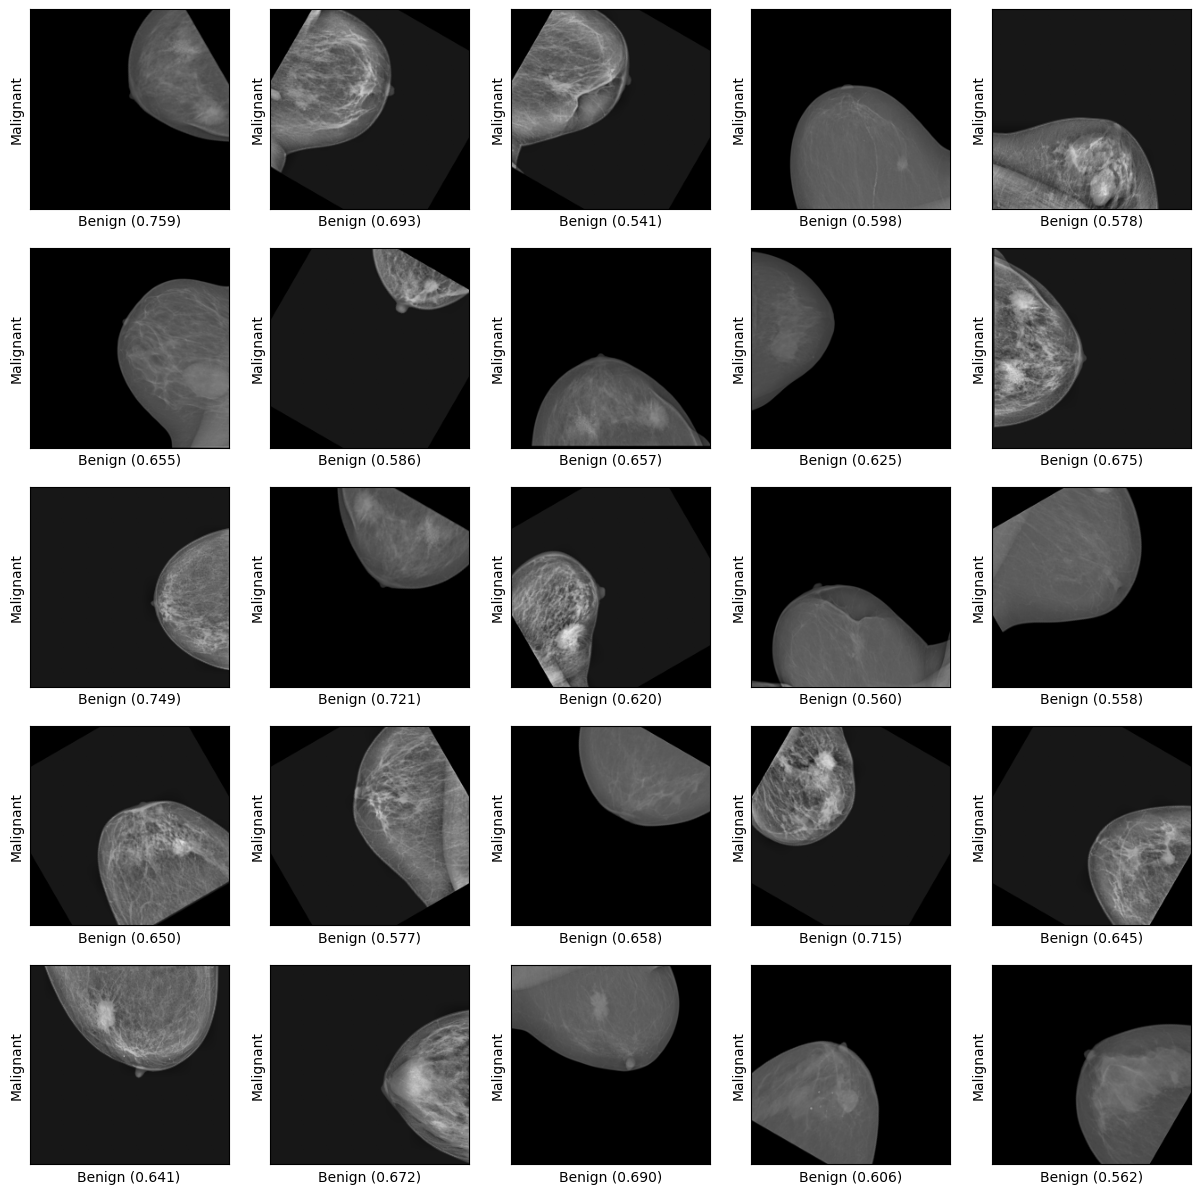

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
backbone3.training = False

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D # Import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense


backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')
backbone3.training = False

ResNet50_model = Sequential()
ResNet50_model.add(backbone3)
ResNet50_model.add(GlobalAveragePooling2D()) # Now it should work
ResNet50_model.add(Dropout(0.5))
ResNet50_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
ResNet50_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
import tensorflow as tf


ResNet50_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
history = ResNet50_model.fit(
    train,  # Pass the training data generator directly as 'x'
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=test,
    validation_steps=STEP_SIZE_VAL,
    epochs=10
)
ResNet50_model.save('/content/drive/MyDrive/Breast-Cancer-Classification/ResNet50_model.h5')

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.6925 - loss: 0.6053 - val_accuracy: 0.6649 - val_loss: 0.7888
Epoch 2/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 31s 539ms/step - accuracy: 0.9062 - loss: 0.2300

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9062 - loss: 0.2300 - val_accuracy: 0.7097 - val_loss: 0.6971
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 709ms/step - accuracy: 0.9585 - loss: 0.1221 - val_accuracy: 0.6659 - val_loss: 0.6613
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0365 - val_accuracy: 0.6774 - val_loss: 0.6489
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 695ms/step - accuracy: 0.9781 - loss: 0.0641 - val_accuracy: 0.6676 - val_loss: 0.6378
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 0.6290 - val_loss: 0.6574
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 698ms/step - accuracy: 0.9956 - loss: 0.0253 - val_accuracy: 0.6455 - val_loss: 0.6594
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.5645 - val_loss: 0.6919
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 700ms/step - accuracy: 0.9978 - loss: 0.0091 - val_accuracy: 0.5560 - val_los

In [ ]:
ResNet50_model = load_model('/content/drive/MyDrive/Breast-Cancer-Classification/ResNet50_model.h5')

In [ ]:
y_pred_prob_4 = ResNet50_model.predict(X_test)
threshold = 0.5
y_pred_4 = np.where(y_pred_prob_4 > threshold, 1,0)
y_pred_4.squeeze()

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step


array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred_4[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob_4, axis=1)
prediction_probs = np.max(y_pred_prob_4, axis=1)

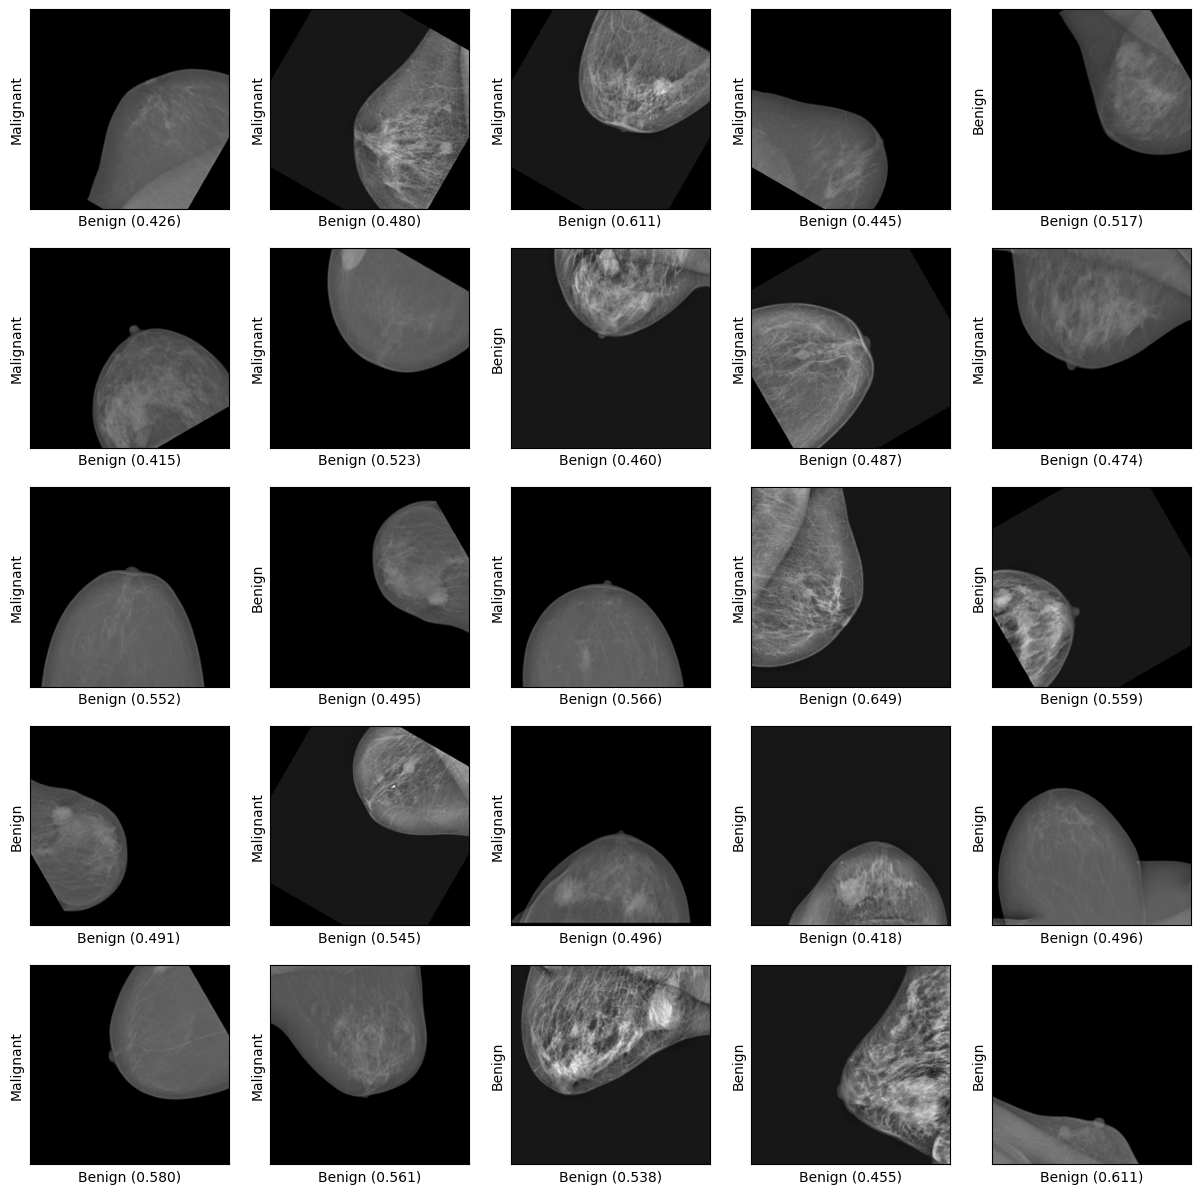

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
import cv2
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class BreastCancerClassifier:
    def __init__(self, img_size=224, batch_size=64):
        self.img_size = img_size
        self.batch_size = batch_size
        self.model = None
        self.svm = None
        self.scaler = None

    def load_and_process_images(self, directory):
        """Load images and extract tumor sizes with improved detection"""
        images = []
        tumor_sizes = []

        for img_name in os.listdir(directory):
            if img_name.endswith(('.png', '.jpg', '.jpeg')):
                # Load image
                img_path = os.path.join(directory, img_name)
                img = load_img(img_path, target_size=(self.img_size, self.img_size))
                img_array = img_to_array(img)

                # Convert to grayscale
                gray = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_RGB2GRAY)

                # Enhanced preprocessing
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                enhanced = clahe.apply(gray)

                # Multi-level thresholding
                blur = cv2.GaussianBlur(enhanced, (5, 5), 0)
                thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)[1]
                thresh2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

                # Combine thresholds
                combined_thresh = cv2.bitwise_or(thresh1, thresh2)

                # Morphological operations
                kernel = np.ones((3,3), np.uint8)
                opening = cv2.morphologyEx(combined_thresh, cv2.MORPH_OPEN, kernel, iterations=2)

                # Find contours
                contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                if contours:
                    largest_contour = max(contours, key=cv2.contourArea)
                    tumor_size = cv2.contourArea(largest_contour)

                    if tumor_size > 100:  # Minimum size threshold
                        images.append(img_array / 255.0)
                        tumor_sizes.append(tumor_size)

        return np.array(images), np.array(tumor_sizes)

    def assign_stages(self, tumor_sizes):
        """Assign stages based on tumor size with improved distribution"""
        if len(tumor_sizes) == 0:
            raise ValueError("No valid tumor sizes detected")

        # Calculate size ranges for stages
        min_size = np.min(tumor_sizes)
        max_size = np.max(tumor_sizes)
        size_range = max_size - min_size

        # Create stage boundaries
        boundaries = [
            min_size,
            min_size + size_range * 0.2,
            min_size + size_range * 0.4,
            min_size + size_range * 0.6,
            min_size + size_range * 0.8,
            max_size
        ]

        stages = np.ones_like(tumor_sizes, dtype=int)  # Initialize with 1s instead of 0s

        # Assign stages based on boundaries
        for i in range(5):
            mask = (tumor_sizes > boundaries[i]) & (tumor_sizes <= boundaries[i + 1])
            stages[mask] = i + 1

        # Print stage distribution before any modifications
        print("Initial stage distribution:", np.bincount(stages)[1:] if len(np.bincount(stages)) > 1 else "No stages assigned")

        # Ensure we have at least one sample in each stage
        unique_stages = np.unique(stages)
        if len(unique_stages) < 5:
            print(f"Warning: Only found {len(unique_stages)} different stages")

            # Create more balanced distribution if we don't have all stages
            n_samples = len(tumor_sizes)
            base_samples = n_samples // 5
            remainder = n_samples % 5

            # Distribute samples across stages
            new_stages = []
            for i in range(5):
                count = base_samples + (1 if i < remainder else 0)
                new_stages.extend([i + 1] * count)

            # Shuffle the new stages
            np.random.shuffle(new_stages)
            stages = np.array(new_stages)

        print("Final stage distribution:", np.bincount(stages)[1:])


        return stages

    def create_hybrid_model(self):
        """Create hybrid model combining CNN and ResNet50"""
        input_layer = Input(shape=(self.img_size, self.img_size, 3))

        # CNN Branch
        cnn = Conv2D(32, (3, 3), activation='relu')(input_layer)
        cnn = BatchNormalization()(cnn)
        cnn = MaxPooling2D()(cnn)

        cnn = Conv2D(64, (3, 3), activation='relu')(cnn)
        cnn = BatchNormalization()(cnn)
        cnn = MaxPooling2D()(cnn)

        cnn = Conv2D(128, (3, 3), activation='relu')(cnn)
        cnn = BatchNormalization()(cnn)
        cnn = GlobalAveragePooling2D()(cnn)

        # ResNet50 Branch
        resnet_base = ResNet50(
            weights='imagenet',
            include_top=False,
            input_tensor=input_layer
        )

        for layer in resnet_base.layers:
            layer.trainable = False

        resnet = GlobalAveragePooling2D()(resnet_base.output)

        # Combine branches
        combined = Concatenate()([cnn, resnet])
        combined = Dense(512, activation='relu')(combined)
        combined = Dropout(0.5)(combined)
        combined = Dense(256, activation='relu')(combined)
        combined = Dropout(0.3)(combined)

        # Output layer (5 stages)
        outputs = Dense(5, activation='softmax')(combined)

        model = Model(inputs=input_layer, outputs=outputs)
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train(self, train_dir):
        """Train the stage classification model"""
        print("Loading and processing images...")
        X_all, sizes = self.load_and_process_images(train_dir)

        if len(sizes) == 0:
            raise ValueError("No valid images found for training")

        print(f"Found {len(sizes)} valid images")
        print("Assigning stages...")
        y_all = self.assign_stages(sizes) - 1  # Convert to 0-based indexing

        # Print stage distribution
        stage_dist = np.bincount(y_all)[1:]
        print("Stage distribution:", stage_dist)

        # Split data
        X_train, X_val, y_train, y_val = train_test_split(
            X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
        )

        print("Creating and training hybrid model...")
        self.model = self.create_hybrid_model()

        # Data augmentation
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        callbacks = [
            EarlyStopping(patience=5, restore_best_weights=True),
            ModelCheckpoint(
                'stage_classification_model.keras',
                save_best_only=True,
                monitor='val_accuracy'
            )
        ]

        # Train model
        history = self.model.fit(
            datagen.flow(X_train, y_train, batch_size=self.batch_size),
            validation_data=(X_val, y_val),
            epochs=50,
            callbacks=callbacks
        )

        # Train SVM
        print("Training SVM classifier...")
        feature_model = Model(inputs=self.model.input, outputs=self.model.layers[-3].output)
        train_features = feature_model.predict(X_train)

        self.svm = SVC(kernel='rbf', probability=True)
        self.scaler = StandardScaler()
        train_features_scaled = self.scaler.fit_transform(train_features)
        self.svm.fit(train_features_scaled, y_train)

        return history

    def predict_stage(self, image_path):
        """Predict tumor stage for a single image"""
        # Load and preprocess image
        img = load_img(image_path, target_size=(self.img_size, self.img_size))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Get predictions from both models
        hybrid_pred = self.model.predict(img_array)
        hybrid_stage = np.argmax(hybrid_pred) + 1

        # Get SVM prediction
        feature_model = Model(inputs=self.model.input, outputs=self.model.layers[-3].output)
        features = feature_model.predict(img_array)
        features_scaled = self.scaler.transform(features)
        svm_stage = self.svm.predict(features_scaled)[0] + 1

        # Combine predictions
        final_stage = round((hybrid_stage + svm_stage) / 2)

        return final_stage, hybrid_pred[0][final_stage-1]

    def save_models(self):
        """Save all models and components"""
        self.model.save('stage_classification_model.keras')
        with open('stages_svm_model.pkl', 'wb') as f:
            pickle.dump((self.svm, self.scaler), f)

    def load_models(self):
        """Load all models and components"""
        self.model = tf.keras.models.load_model('stage_classification_model.keras')
        with open('stages_svm_model.pkl', 'rb') as f:
            self.svm, self.scaler = pickle.load(f)

def visualize_tumor_detection(image_path, img_size=224):
    """Visualize the tumor detection process for debugging"""
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img)

    # Process image
    gray = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    blur = cv2.GaussianBlur(enhanced, (5, 5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Show results
    plt.figure(figsize=(15, 5))
    plt.subplot(141), plt.imshow(img_array.astype(np.uint8)), plt.title('Original')
    plt.subplot(142), plt.imshow(enhanced, cmap='gray'), plt.title('Enhanced')
    plt.subplot(143), plt.imshow(blur, cmap='gray'), plt.title('Blurred')
    plt.subplot(144), plt.imshow(thresh, cmap='gray'), plt.title('Threshold')
    plt.show()

# Main execution
def main():
    # Initialize classifier
    classifier = BreastCancerClassifier()

    try:
        print("Starting model training...")
        history = classifier.train('/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/train/Malignant/')

        # Save models
        print("Saving models...")
        classifier.save_models()

        # Test prediction
        test_image = '/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/test/Malignant/20586934 (10).png'
        stage, confidence = classifier.predict_stage(test_image)
        print(f"\nTest prediction for {test_image}:")
        print(f"Predicted Stage: {stage} (Confidence: {confidence:.2%})")

    except Exception as e:
        print(f"Error during execution: {e}")
        print("\nTrying to debug tumor detection...")
        # Visualize tumor detection for a sample image
        sample_dir = '/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/train/Malignant/'
        sample_image = os.path.join(sample_dir, os.listdir(sample_dir)[0])
        visualize_tumor_detection(sample_image)

if __name__ == "__main__":
    main()

Starting model training...
Loading and processing images...
Found 2576 valid images
Assigning stages...
Initial stage distribution: [220 677 970 546 163]
Final stage distribution: [220 677 970 546 163]
Stage distribution: [677 970 546 163]
Creating and training hybrid model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.3286 - loss: 1.5678 - val_accuracy: 0.3760 - val_loss: 1.4065
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 749ms/step - accuracy: 0.4557 - loss: 1.1898 - val_accuracy: 0.4477 - val_loss: 1.3845
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 709ms/step - accuracy: 0.4582 - loss: 1.1697 - val_accuracy: 0.3760 - val_loss: 1.5002
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 756ms/step - accuracy: 0.4935 - loss: 1.1244 - val_accuracy: 0.3760 - val_loss: 1.5755
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 731ms/step - accuracy: 0.4840 - loss: 1.1281 - val_accuracy: 0.4419 - val_loss: 1.4317
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 744ms/step - accuracy: 0.5031 - loss: 1.0808 - val_accuracy: 0.3779 - val_loss: 1.3584
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 706ms/step - accuracy: 0.5209 - loss: 1.0488 - val_accuracy: 0.2539 - val_loss: 2.2707
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 726ms/step - accuracy: 0.5031 - loss: 1.0683 - val_accuracy: 0.3779 -

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import pickle
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import os
import matplotlib.pyplot as plt

class BreastCancerPredictor:
    def __init__(self, model_path='stage_classification_model.keras',
                 svm_path='stages_svm_model.pkl', img_size=224):
        self.img_size = img_size
        self.load_models(model_path, svm_path)

    def load_models(self, model_path, svm_path):
        """Load the saved hybrid model and SVM classifier"""
        try:
            print("Loading models...")
            self.model = tf.keras.models.load_model(model_path)
            with open(svm_path, 'rb') as f:
                self.svm, self.scaler = pickle.load(f)
            print("Models loaded successfully!")
        except Exception as e:
            raise Exception(f"Error loading models: {str(e)}")

    def preprocess_image(self, image_path):
        """Preprocess a single image for prediction"""
        try:
            # Load and resize image
            img = load_img(image_path, target_size=(self.img_size, self.img_size))
            img_array = img_to_array(img)

            # Normalize
            img_array = img_array / 255.0

            # Add batch dimension
            img_array = np.expand_dims(img_array, axis=0)

            return img_array, img
        except Exception as e:
            raise Exception(f"Error preprocessing image: {str(e)}")

    def visualize_prediction(self, image, stage, confidence, save_path=None):
        """Visualize the prediction results"""
        plt.figure(figsize=(10, 6))
        plt.imshow(image)
        plt.title(f'Predicted Stage: {stage}\nConfidence: {confidence:.2%}')
        plt.axis('off')

        if save_path:
            plt.savefig(save_path)
            print(f"Visualization saved to {save_path}")

        plt.show()

    def predict_image(self, image_path, visualize=True):
        """Predict cancer stage for a single image"""
        try:
            # Preprocess image
            img_array, original_img = self.preprocess_image(image_path)

            # Get predictions from hybrid model
            hybrid_pred = self.model.predict(img_array, verbose=0)
            hybrid_stage = np.argmax(hybrid_pred) + 1

            # Get SVM prediction
            feature_model = Model(inputs=self.model.input, outputs=self.model.layers[-3].output)
            features = feature_model.predict(img_array, verbose=0)
            features_scaled = self.scaler.transform(features)
            svm_stage = self.svm.predict(features_scaled)[0] + 1

            # Combine predictions
            final_stage = round((hybrid_stage + svm_stage) / 2)
            confidence = hybrid_pred[0][final_stage-1]

            # Create prediction results dictionary
            results = {
                'stage': final_stage,
                'confidence': confidence,
                'hybrid_stage': hybrid_stage,
                'svm_stage': svm_stage,
                'stage_probabilities': hybrid_pred[0]
            }

            # Visualize if requested
            if visualize:
                self.visualize_prediction(original_img, final_stage, confidence)

            return results

        except Exception as e:
            raise Exception(f"Error during prediction: {str(e)}")

def test_multiple_images(predictor, image_dir, output_dir=None):
    """Test multiple images from a directory"""
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    results = []
    for img_name in os.listdir(image_dir):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_dir, img_name)
            print(f"\nProcessing {img_name}...")

            try:
                # Predict image
                prediction = predictor.predict_image(
                    image_path,
                    visualize=True
                )

                # Save visualization if output directory is provided
                if output_dir:
                    save_path = os.path.join(output_dir, f'pred_{img_name}')
                    predictor.visualize_prediction(
                        load_img(image_path),
                        prediction['stage'],
                        prediction['confidence'],
                        save_path
                    )

                # Store results
                results.append({
                    'image': img_name,
                    'prediction': prediction
                })

                # Print prediction details
                print(f"Stage: {prediction['stage']}")
                print(f"Confidence: {prediction['confidence']:.2%}")
                print(f"Hybrid Stage: {prediction['hybrid_stage']}")
                print(f"SVM Stage: {prediction['svm_stage']}")
                print("Stage Probabilities:",
                      [f"{p:.2%}" for p in prediction['stage_probabilities']])

            except Exception as e:
                print(f"Error processing {img_name}: {str(e)}")
                continue

    return results

def main():
    # Configuration
    MODEL_PATH = '/content/drive/MyDrive/Breast-Cancer-Classification/stage_classification_model.keras'
    SVM_PATH = '/content/drive/MyDrive/Breast-Cancer-Classification/stages_svm_model.pkl'
    TEST_DIR = '/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/test/Malignant'  # Directory containing test images
    OUTPUT_DIR = 'predictions'  # Directory to save visualizations

    try:
        # Initialize predictor
        predictor = BreastCancerPredictor(MODEL_PATH, SVM_PATH)

        # Test single image
        if len(os.listdir(TEST_DIR)) > 0:
            sample_image = os.path.join(TEST_DIR, os.listdir(TEST_DIR)[0])
            print("\nTesting single image:", sample_image)
            result = predictor.predict_image(sample_image)
            print(f"Prediction for single image:")
            print(f"Stage: {result['stage']}")
            print(f"Confidence: {result['confidence']:.2%}")

        # Test multiple images
        print("\nTesting multiple images...")
        results = test_multiple_images(predictor, TEST_DIR, OUTPUT_DIR)

        # Print summary
        print("\nTesting completed!")
        print(f"Processed {len(results)} images")

    except Exception as e:
        print(f"Error during testing: {str(e)}")

if __name__ == "__main__":
    main()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
import pickle
import cv2


class BreastCancerClassifier:
    def __init__(self, img_size=224):
        self.img_size = img_size
        self.model = None
        self.svm = None
        self.scaler = None

    def load_models(self):
        self.model = tf.keras.models.load_model('/content/drive/MyDrive/Breast-Cancer-Classification/stage_classification_model.keras')
        with open('/content/drive/MyDrive/Breast-Cancer-Classification/stages_svm_model.pkl', 'rb') as f:
            self.svm, self.scaler = pickle.load(f)

    def predict_stage(self, image_path):
        img = load_img(image_path, target_size=(self.img_size, self.img_size))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        hybrid_pred = self.model.predict(img_array)
        hybrid_stage = np.argmax(hybrid_pred) + 1

        feature_model = Model(inputs=self.model.input, outputs=self.model.layers[-3].output)
        features = feature_model.predict(img_array)
        features_scaled = self.scaler.transform(features)
        svm_stage = self.svm.predict(features_scaled)[0] + 1

        final_stage = round((hybrid_stage + svm_stage) / 2)
        return final_stage, hybrid_pred[0][final_stage-1]

class BreastCancerDetector:
    def __init__(self, benign_malignant_model_path, stage_model_path, svm_model_path):
        self.resnet_model = load_model(benign_malignant_model_path)
        self.stage_classifier = BreastCancerClassifier()
        self.stage_classifier.load_models()

    def process_image(self, image_path):
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        return img_array

    def predict(self, image_path):
        img_array = self.process_image(image_path)

        pred_prob = self.resnet_model.predict(img_array)
        # Changed threshold logic - if probability < 0.5, it's benign
        is_malignant = pred_prob[0][0] < 0.6

        result = {
            'diagnosis': 'Malignant' if is_malignant else 'Benign',
            'confidence': float(abs(1 - pred_prob[0][0]))
        }

        if is_malignant:
            stage, stage_confidence = self.stage_classifier.predict_stage(image_path)
            result['stage'] = int(stage)
            result['stage_confidence'] = float(stage_confidence)


        return result

def test_image(image_path):
    detector = BreastCancerDetector(
        benign_malignant_model_path='/content/drive/MyDrive/Breast-Cancer-Classification/model.h5',
        stage_model_path='/content/drive/MyDrive/Breast-Cancer-Classification/stage_classification_model.keras',
        svm_model_path='/content/drive/MyDrive/Breast-Cancer-Classification/stages_svm_model.pkl'
    )

    result = detector.predict(image_path)

    print(f"Diagnosis: {result['diagnosis']}")
    print(f"Confidence: {result['confidence']:.2%}")

    if result['diagnosis'] == 'Malignant':
        print(f"Stage: {result['stage']}")
        print(f"Stage Confidence: {result['stage_confidence']:.2%}")

    return result

result = test_image('/content/drive/MyDrive/Breast-Cancer-Classification/DataSet/train/Malignant/20586934 (24).png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Diagnosis: Benign
Confidence: 36.02%
